# Visualizing Data using Matplotlib with Data London Crime by LSOA

In [79]:
import numpy as np
import pandas as pd

## Prepocessing

In [80]:
df = pd.read_csv('./dataset/london_crime_by_lsoa.csv')

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [81]:
# Let's view the top 5 rows of the dataset using the head() function.
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [82]:
# We can also veiw the bottom 5 rows of the dataset using the tail() function.
df.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [84]:
df.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [85]:
df.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603],
      dtype=int64)

In [86]:
df.shape

(13490604, 7)

In [87]:
criminal = df[df['minor_category'] == 'Other Theft']

In [88]:
criminal.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490460,E01003774,Redbridge,Theft and Handling,Other Theft,0,2014,5
13490483,E01004360,Waltham Forest,Theft and Handling,Other Theft,0,2008,8
13490545,E01004712,Westminster,Theft and Handling,Other Theft,17,2012,6
13490564,E01002499,Hillingdon,Theft and Handling,Other Theft,0,2008,12
13490598,E01032577,Hillingdon,Theft and Handling,Other Theft,0,2012,2


In [89]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [90]:
mpl.style.use(['ggplot']) # optional: for ggplot-like style

## Area Pots (Series/Dataframe)

In [91]:
pd.pivot_table(df, values='value', index=['major_category'], columns=['year'], aggfunc=np.sum)

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
major_category,,,,,,,,,
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914
Fraud or Forgery,5325,0,0,0,0,0,0,0,0
Other Notifiable Offences,10112,10644,10768,10264,10675,10811,13037,14229,15809
Robbery,29627,29568,32341,36679,35260,29337,22150,21383,22528
Sexual Offences,1273,0,0,0,0,0,0,0,0
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381


In [92]:
df_data_fix = pd.pivot_table(df, values='value', index=['major_category'], columns=['year'], aggfunc=np.sum).transpose()

In [93]:
df_data_fix

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


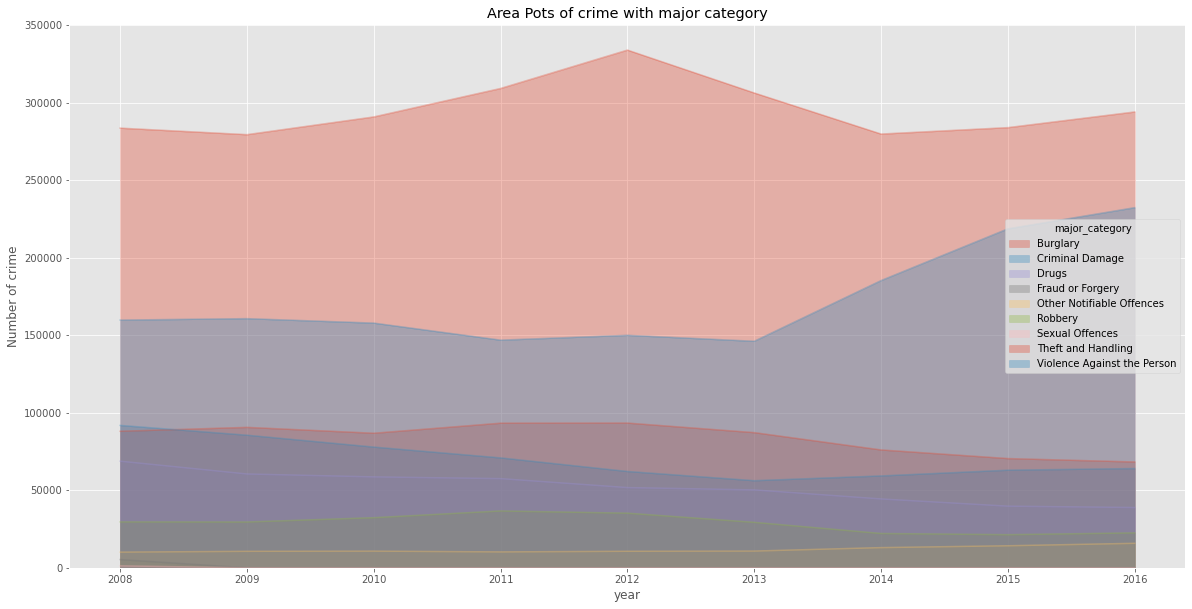

In [94]:
# Write your function below
df_data_fix.index = df_data_fix.index.map(int)

# Graded-Funtion Begin (~2 Lines)

df_data_fix.plot(kind='area',
                 alpha=0.35,
                 stacked=False,
                figsize=(20,10),)

# Graded-Funtion End

plt.title('Area Pots of crime with major category') # add a title to the histogram
plt.ylabel('Number of crime') # add y-label
plt.xlabel('year') # add x-label

plt.show()

Insight
1. dari data tersebut, jumlah kriminal major category dari Violence Against the Person cenderung mengalami kenaikan dari tahun ke tahun.
2. sedangkan jumlah kriminal untuk major category dari Fraud or Forgery dan Sexual Offences hanya terjadi di tahun 2008 dan pada tahun setelanya sudah tidak terjadi lagi.
3. jumlah kriminal dari major category yg cenderung menurun adalah Burglary, Criminal Damage dan Drugs

## Histogram

In [95]:
df_data_hist=pd.pivot_table(df, values='value', index=['minor_category'], columns=['year'], aggfunc=np.sum)

In [96]:
df_data_hist

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
minor_category,,,,,,,,,
Assault with Injury,56586,55297,54173,50768,50369,39929,45677,48164,50038
Burglary in Other Buildings,31437,30434,29703,30876,31676,30685,27078,25833,25289
Burglary in a Dwelling,56655,60185,57123,62439,61716,56537,48975,44656,42996
Business Property,2964,3115,3041,2685,2450,2026,1642,1718,1654
Common Assault,37356,39671,41591,40502,39246,37882,51244,61758,64440
Counted per Victim,3840,0,0,0,0,0,0,0,0
Criminal Damage To Dwelling,23519,22475,20253,18037,15330,13512,13391,13648,13951
Criminal Damage To Motor Vehicle,41693,36621,32907,29494,25777,23452,24137,25595,25787
Criminal Damage To Other Building,9011,8348,7962,7445,6753,6367,6641,6776,6700


In [97]:
df_data_hist['Total']=df_data_hist.sum(axis=1)

In [98]:
df_data_hist

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
minor_category,,,,,,,,,,
Assault with Injury,56586,55297,54173,50768,50369,39929,45677,48164,50038,451001
Burglary in Other Buildings,31437,30434,29703,30876,31676,30685,27078,25833,25289,263011
Burglary in a Dwelling,56655,60185,57123,62439,61716,56537,48975,44656,42996,491282
Business Property,2964,3115,3041,2685,2450,2026,1642,1718,1654,21295
Common Assault,37356,39671,41591,40502,39246,37882,51244,61758,64440,413690
Counted per Victim,3840,0,0,0,0,0,0,0,0,3840
Criminal Damage To Dwelling,23519,22475,20253,18037,15330,13512,13391,13648,13951,154116
Criminal Damage To Motor Vehicle,41693,36621,32907,29494,25777,23452,24137,25595,25787,265463
Criminal Damage To Other Building,9011,8348,7962,7445,6753,6367,6641,6776,6700,66003


In [99]:
df_data_hist.sort_values(by='Total', ascending=True,axis=0,inplace=True)

In [100]:
df_data_hist_sort=df_data_hist.sort_values(by='Total', ascending=False,axis=0,inplace=True)

In [101]:
df_data_hist

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
minor_category,,,,,,,,,,
Other Theft,99280,95424,103997,113616,132056,115757,108577,107571,103807,980085
Theft From Motor Vehicle,76570,68856,69709,69604,68198,63509,52167,50024,51319,569956
Burglary in a Dwelling,56655,60185,57123,62439,61716,56537,48975,44656,42996,491282
Harassment,43389,43594,42808,37493,43396,41805,55330,71633,78676,458124
Assault with Injury,56586,55297,54173,50768,50369,39929,45677,48164,50038,451001
Possession Of Drugs,64228,56070,54026,52769,47491,45755,40309,36097,35203,431948
Common Assault,37356,39671,41591,40502,39246,37882,51244,61758,64440,413690
Theft From Shops,32857,36349,36935,36351,36562,36441,40141,42549,46957,345142
Other Theft Person,24453,27549,29547,36090,46585,44964,30957,33829,34868,308842


In [102]:
df_data_hist_fix=df_data_hist.loc[['Theft From Motor Vehicle','Burglary in a Dwelling','Harassment']].transpose()

In [103]:
df_data_hist_fix

minor_category,Theft From Motor Vehicle,Burglary in a Dwelling,Harassment
year,,,
2008,76570,56655,43389
2009,68856,60185,43594
2010,69709,57123,42808
2011,69604,62439,37493
2012,68198,61716,43396
2013,63509,56537,41805
2014,52167,48975,55330
2015,50024,44656,71633
2016,51319,42996,78676


In [104]:
df_data_hist_fix1=df_data_hist_fix.iloc[0:9]

In [105]:
df_data_hist_fix1

minor_category,Theft From Motor Vehicle,Burglary in a Dwelling,Harassment
year,,,
2008,76570,56655,43389
2009,68856,60185,43594
2010,69709,57123,42808
2011,69604,62439,37493
2012,68198,61716,43396
2013,63509,56537,41805
2014,52167,48975,55330
2015,50024,44656,71633
2016,51319,42996,78676


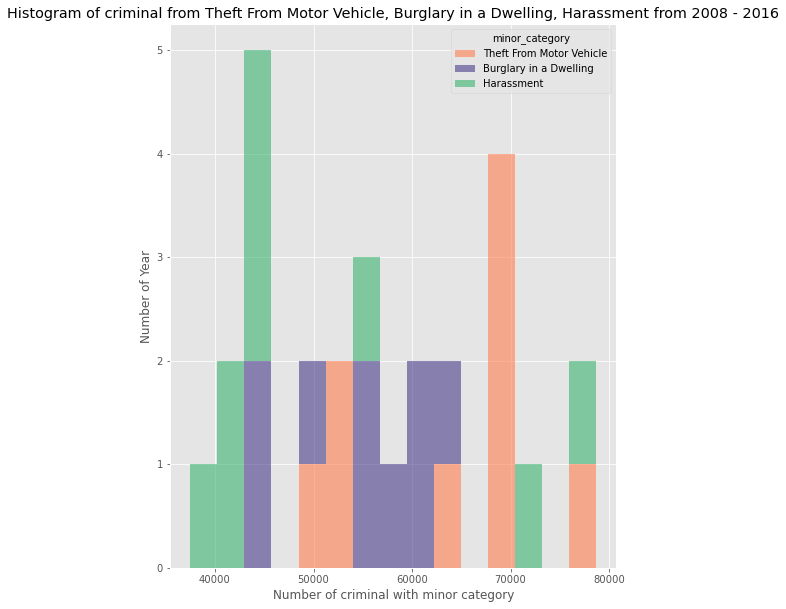

In [106]:
# Write your function below
df_data_hist_fix1
count,bin_edges = np.histogram(df_data_hist,15)

# Graded-Funtion Begin (~2 Lines)
df_data_hist_fix1.plot(kind='hist',
                       figsize=(8,10),
                       bins=15,
                       alpha=0.6,
                       stacked=True,
                 color=['coral','darkslateblue','mediumseagreen']
                      )

# Graded-Funtion End

plt.title('Histogram of criminal from Theft From Motor Vehicle, Burglary in a Dwelling, Harassment from 2008 - 2016') # add a title to the histogram
plt.ylabel('Number of Year') # add y-label
plt.xlabel('Number of criminal with minor category') # add x-label

plt.show()

Insight
1. jumlah kriminal minor category dari Theft From Motor Vehicle cendenrung mengalami penurunan
2. jumlah kriminal minor category dari Burglary in a Dwelling relatif tetap dan mulai konsisten turun sejak tahun 2011
3. jumlah kriminal minor category dari Harassment terus meningkat setiap tahunnya

## Bar Charts (Dataframe)

In [107]:
df_data_bar=pd.pivot_table(df, values='value', index=['major_category'], columns=['year'], aggfunc=np.sum)

In [108]:
df_data_bar

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
major_category,,,,,,,,,
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914
Fraud or Forgery,5325,0,0,0,0,0,0,0,0
Other Notifiable Offences,10112,10644,10768,10264,10675,10811,13037,14229,15809
Robbery,29627,29568,32341,36679,35260,29337,22150,21383,22528
Sexual Offences,1273,0,0,0,0,0,0,0,0
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381


In [109]:
df_data_bar['Total']=df_data_bar.sum(axis=1)

In [110]:
df_data_bar

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
major_category,,,,,,,,,,
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285,754293
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071,630938
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914,470765
Fraud or Forgery,5325,0,0,0,0,0,0,0,0,5325
Other Notifiable Offences,10112,10644,10768,10264,10675,10811,13037,14229,15809,106349
Robbery,29627,29568,32341,36679,35260,29337,22150,21383,22528,258873
Sexual Offences,1273,0,0,0,0,0,0,0,0,1273
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133,2661861
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381,1558081


In [111]:
df_data_bar.sort_values(by='Total',ascending=False,inplace=True)

In [112]:
df_data_bar

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
major_category,,,,,,,,,,
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133,2661861
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381,1558081
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285,754293
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071,630938
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914,470765
Robbery,29627,29568,32341,36679,35260,29337,22150,21383,22528,258873
Other Notifiable Offences,10112,10644,10768,10264,10675,10811,13037,14229,15809,106349
Fraud or Forgery,5325,0,0,0,0,0,0,0,0,5325
Sexual Offences,1273,0,0,0,0,0,0,0,0,1273


In [113]:
df_data_bar_fix = df_data_bar['Total']

In [114]:
df_data_bar_fix.sort_values

<bound method Series.sort_values of major_category
Theft and Handling             2661861
Violence Against the Person    1558081
Burglary                        754293
Criminal Damage                 630938
Drugs                           470765
Robbery                         258873
Other Notifiable Offences       106349
Fraud or Forgery                  5325
Sexual Offences                   1273
Name: Total, dtype: int64>

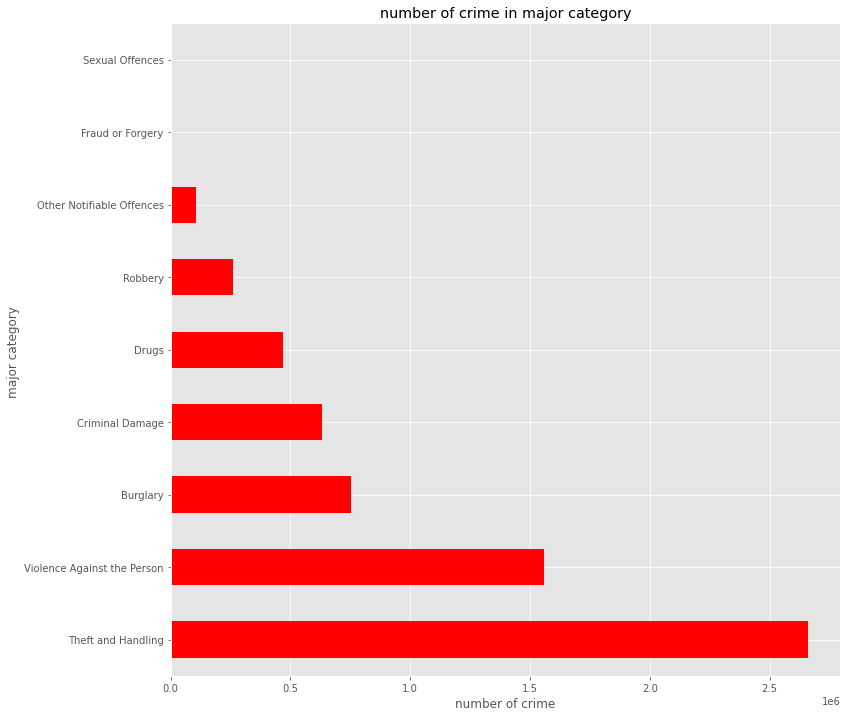

In [115]:
# Write your function below
df_data_bar_fix
# Graded-Funtion Begin (~1 Lines)
df_data_bar_fix.plot(kind='barh', figsize=(12,12), color='red')
# Graded-Funtion End

plt.xlabel('number of crime') # add to x-label to the plot
plt.ylabel('major category ') # add y-label to the plot
plt.title('number of crime in major category') # add title to the plot

plt.show()

insight
Urutan total kriminal (major category) dari tahun 20018 sampai 2016 dari terbanyak hingga paling sedikit adalah:
1. Theft and Handling
2. Violence Against the Person
3. Burglary
4. Criminal Damage
5. Drugs
6. Robbery
7. Other Notifiable Offences
8. Fraud or Forgery
9. Sexual Offences

## Pie Charts

In [116]:
df_data_pie=pd.pivot_table(df, values='value', index=['major_category'], columns=['year'], aggfunc=np.sum)

In [117]:
df_data_pie

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
major_category,,,,,,,,,
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914
Fraud or Forgery,5325,0,0,0,0,0,0,0,0
Other Notifiable Offences,10112,10644,10768,10264,10675,10811,13037,14229,15809
Robbery,29627,29568,32341,36679,35260,29337,22150,21383,22528
Sexual Offences,1273,0,0,0,0,0,0,0,0
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381


In [118]:
df_major = df.groupby('major_category', axis=0).sum()
df_major

,value,year,month
major_category,,,
Burglary,754293,2099731248,6783426
Criminal Damage,630938,4163174064,13449618
Drugs,470765,2373089616,7666542
Fraud or Forgery,5325,475878240,1537380
Other Notifiable Offences,106349,1561923648,5045976
Robbery,258873,1890040608,6105996
Sexual Offences,1273,217513296,702702
Theft and Handling,2661861,7980195600,25780950
Violence Against the Person,1558081,6381548928,20616336


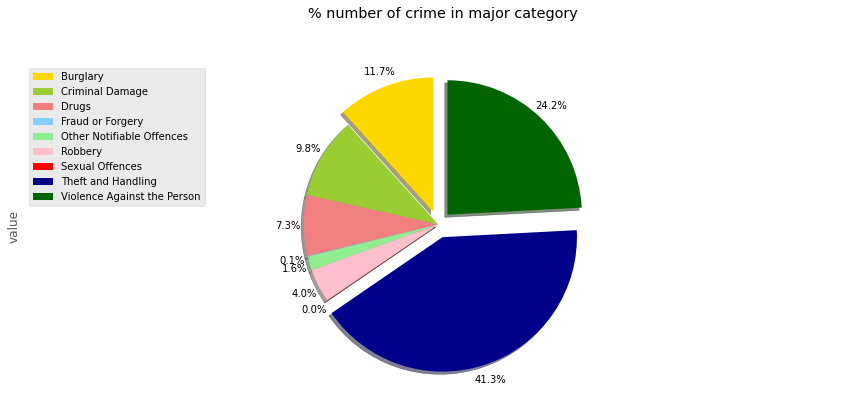

In [119]:
# Write your function below
df_major
clolors_list=['gold','yellowgreen','lightcoral','lightskyblue','lightgreen','pink','red','darkblue','darkgreen']
# ratio for each continent with which to offset each wedge.
explode_list = [0.1, 0, 0, 0, 0, 0, 0, 0.1, 0.1]

# Graded-Funtion Begin (~8 Lines)
df_major['value'].plot(kind='pie',
                      figsize=(15, 6),
                      autopct='%1.1f%%',
                      startangle=90,
                      shadow=True,
                      labels=None,         # turn off labels on pie chart
                      # the ratio between the center of each pie slice and the start of the text generated by autopct
                      pctdistance=1.12,
                       colors=clolors_list,
                      explode=explode_list  # 'explode'
                      )
# Graded-Funtion End

# scale the title up by 12% to match pctdistance
plt.title('% number of crime in major category', y=1.12)

plt.axis('equal')

# add legend
plt.legend(labels=df_major.index, loc='upper left')

plt.show()

insight
total Proporsi kriminal dari tahun 2008 sampai 2016 untuk major category dari tertinggi sampai yang terendah adalah:
1. Theft and Handling
2. Violence Against the Person
3. Burglary
4. Criminal Damage
5. Drugs
6. Robbery
7. Other Notifiable Offences
8. Fraud or Forgery
9. Sexual Offences

## Box Plots

In [120]:
df_data_Box=pd.pivot_table(df, values='value', index=['borough'], columns=['year'], aggfunc=np.sum)

In [121]:
df_data_Box.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
borough,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164


In [122]:
df_data_Box['Total']=df_data_Box.sum(axis=1)

In [123]:
df_data_Box.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
borough,,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741,149447
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684,212191
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840,114136
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693,227551
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164,184349


In [124]:
df_data_Box_fix=df_data_Box.loc[['Lambeth','Southwark']].transpose()

In [125]:
df_data_Box_fix

borough,Lambeth,Southwark
year,,
2008,31717,33470
2009,31225,30623
2010,31671,31320
2011,33224,30723
2012,33473,30737
2013,31868,31128
2014,31765,28912
2015,33164,30260
2016,34071,31636


In [126]:
df_data_Box_fix1=df_data_Box_fix.iloc[0:9]

In [127]:
df_data_Box_fix1

borough,Lambeth,Southwark
year,,
2008,31717,33470
2009,31225,30623
2010,31671,31320
2011,33224,30723
2012,33473,30737
2013,31868,31128
2014,31765,28912
2015,33164,30260
2016,34071,31636


In [128]:
df_data_Box_fix1.describe()

borough,Lambeth,Southwark
count,9.000000,9.000000
mean,32464.222222,30978.777778
std,1014.515005,1215.293049
min,31225.000000,28912.000000
25%,31717.000000,30623.000000
50%,31868.000000,30737.000000
75%,33224.000000,31320.000000
max,34071.000000,33470.000000


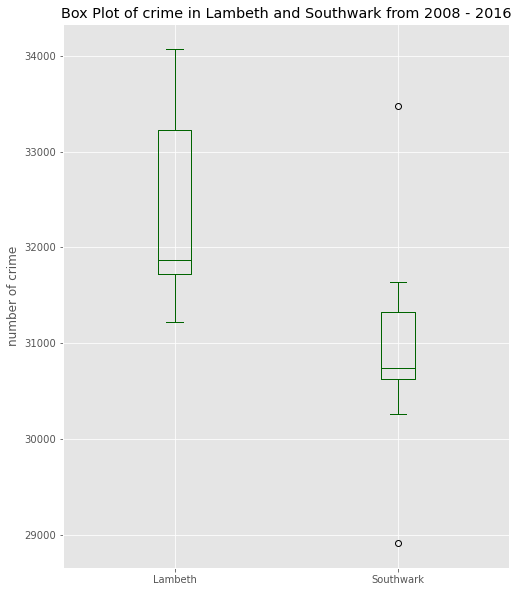

In [129]:
# Write your function below
df_data_Box_fix1
# Graded-Funtion Begin (~1 Lines)
df_data_Box_fix1.plot(kind='box',figsize=(8,10),color='darkgreen')
# Graded-Funtion End

plt.title('Box Plot of crime in Lambeth and Southwark from 2008 - 2016')
plt.ylabel('number of crime')

plt.show()

insight 1
Tingkat kejahatan pada sektor/wilayah Lambeth dari tahun 2008 sampai 2016 adalah:
1. paling sedikit = 31225 kasus kriminal
2. quartil 1 = 31717 kasus kriminal
3. quartil 2 = 31868 kasus kriminal
4. quartil 3 = 33224 kasus kriminal
5. Paling Banyak = 34071 kasus kriminal
6. Rata-Rata = 32464.222222	kasus kriminal

insight 1
Tingkat kejahatan pada sektor/wilayah Southwark dari tahun 2008 sampai 2016 adalah:
1. paling sedikit = 28912 kasus kriminal
2. quartil 1 = 30623 kasus kriminal
3. quartil 2 = 30737 kasus kriminal
4. quartil 3 = 31320 kasus kriminal
5. Paling Banyak = 33470 kasus kriminal
6. Rata-Rata = 30978.777778 kasus kriminal

## Scatter Plots

In [130]:
df_data_Scat=pd.pivot_table(df, values='value', index=['major_category'], columns=['year'], aggfunc=np.sum).transpose()

In [131]:
df_data_Scat

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


In [132]:
df_data_Scat['Total']=df_data_Scat.sum(axis=1)

In [133]:
df_data_Scat

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person,Total
year,,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844,738641
2009,90619,85565,60549,0,10644,29568,0,279492,160777,717214
2010,86826,77897,58674,0,10768,32341,0,290924,157894,715324
2011,93315,70914,57550,0,10264,36679,0,309292,146901,724915
2012,93392,62158,51776,0,10675,35260,0,334054,150014,737329
2013,87222,56206,50278,0,10811,29337,0,306372,146181,686407
2014,76053,59279,44435,0,13037,22150,0,279880,185349,680183
2015,70489,62976,39785,0,14229,21383,0,284022,218740,711624
2016,68285,64071,38914,0,15809,22528,0,294133,232381,736121


In [134]:
df_tot_Scat = pd.DataFrame(df_data_Scat)

In [135]:
df_tot_Scat

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person,Total
year,,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844,738641
2009,90619,85565,60549,0,10644,29568,0,279492,160777,717214
2010,86826,77897,58674,0,10768,32341,0,290924,157894,715324
2011,93315,70914,57550,0,10264,36679,0,309292,146901,724915
2012,93392,62158,51776,0,10675,35260,0,334054,150014,737329
2013,87222,56206,50278,0,10811,29337,0,306372,146181,686407
2014,76053,59279,44435,0,13037,22150,0,279880,185349,680183
2015,70489,62976,39785,0,14229,21383,0,284022,218740,711624
2016,68285,64071,38914,0,15809,22528,0,294133,232381,736121


In [136]:
df_tot_Scat.index=map(int,df_tot_Scat.index)

In [137]:
df_tot_Scat.reset_index(inplace=True)

In [138]:
df_tot_Scat[['index','Total']]

major_category,index,Total
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


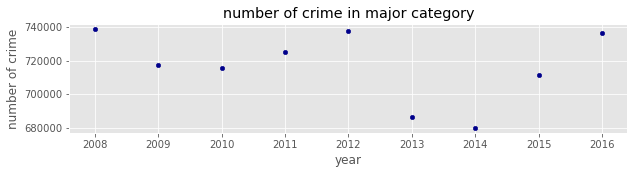

In [139]:
# Write your function below
df_tot_Scat
# Graded-Funtion Begin (~1 Lines)
df_tot_Scat.plot(kind='scatter', x='index', y='Total', figsize=(10, 2), color='darkblue')
# Graded-Funtion End

plt.title('number of crime in major category')
plt.xlabel('year')
plt.ylabel('number of crime')

plt.show()

insight
Jumlah kriminal dari tahun ke tahun cenderung tetap.
1. Pada tahun 2014 adalah jumlah kriminal paling sedikit dari range 2008 sampai 2016
2. Paling banyak adalah terjai pada tahun 2008 dengan total jumlah kriminal 738641 kasus
3. Jumlah kasus sempat turun di 2-13 dan 2014 namun naik lagi pada tahun 2015 adn 2016

## Word Clouds

In [140]:
# install wordcloud
# !conda install -c conda-forge wordcloud --yes

!pip install wordcloud

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

In [141]:
#input text berita
 
contoh_text = open('./dataset/contoh text.txt','r').read()

print('File download and saved!')

File download and saved!


In [142]:
stopwords = set(STOPWORDS)

In [143]:
# instantiate a word cloud object
my_wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
my_wordcloud.generate(contoh_text)

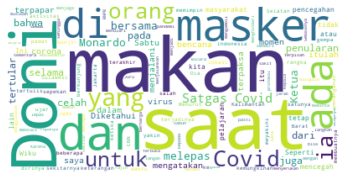

In [144]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
plt.imshow(my_wordcloud, interpolation='bilinear')
# Graded-Funtion End

plt.axis('off')
plt.show()

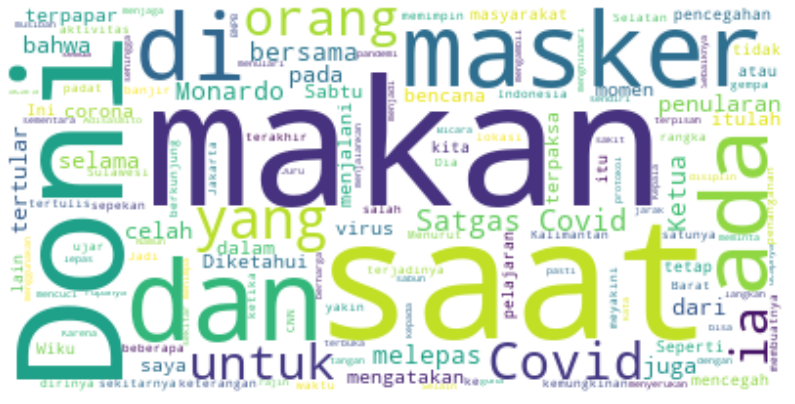

In [145]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(my_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Pada kasus ini menggunakan data berita dari website : https://www.cnnindonesia.com/nasional/20210123125642-20-597496/doni-monardo-yakin-terpapar-covid-19-saat-makan-bersama dengan judul : Doni Monardo Yakin Terpapar Covid-19 Saat Makan Bersama

dimana 10 kata yang paling banyak muncul adalah:
1. Saat
2. Makan
3. Doni
4. Masker
5. Dan
6. Covid
7. ia
8. di
9. ada
10. yang

# Folium

In [146]:
#!conda install -c conda-forge folium=0.5.0 --yes
!pip install folium
import folium

print('Folium installed and imported!')

Folium installed and imported!


In [147]:
# define the world map
world_map = folium.Map()

# display world map
world_map

In [148]:
# define the world map centered around London with a low zoom level 8
world_map=folium.Map(location=[51.5074,0.1278],zoom_start=8)

# Write your function below

# Graded-Funtion Begin (~1 Lines)

# Graded-Funtion End

# display world map
world_map

insight
dengan memasukkan longitude 51.5074 dan latitude 0.1278 akan langsung menuju ke arah peta kota london

# Overall Analysis

insight Jumlah kriminal dari 2008 sampai tahun 2016 cenderung tetap.

1. Pada tahun 2014 adalah jumlah kriminal paling sedikit dari range 2008 sampai 2016
2. Paling banyak adalah terjai pada tahun 2008 dengan total jumlah kriminal 738641 kasus
3. Jumlah kasus sempat turun di 2-13 dan 2014 namun naik lagi pada tahun 2015 adn 2016